<a href="https://colab.research.google.com/github/huynth1801/pytorch-cat-dog/blob/master/cat_and_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-img/photo-1-15291980975752067109398.png
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/inp

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
import torch.nn.functional as F
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms

In [ ]:
train_dir = '../input/cat-and-dog/training_set/training_set'
test_dir = '../input/cat-and-dog/test_set/test_set'

In [ ]:
img = os.listdir(os.path.join(train_dir, 'dogs/'))
print(img[:5])
for i, j in enumerate(img[:6]):
    print(i)
    print(j)

['dog.3443.jpg', 'dog.1942.jpg', 'dog.375.jpg', 'dog.3259.jpg', 'dog.790.jpg']
0
dog.3443.jpg
1
dog.1942.jpg
2
dog.375.jpg
3
dog.3259.jpg
4
dog.790.jpg
5
dog.704.jpg


In [ ]:
import matplotlib.image as mpimg

def show_img(img_list, nrows, ncols, type_pet):
    fig = plt.figure(figsize=(8,8))
    for i, img_path in enumerate(img_list):
        img = mpimg.imread(os.path.join(train_dir, type_pet) + img_path)
        fig.add_subplot(nrows, ncols, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

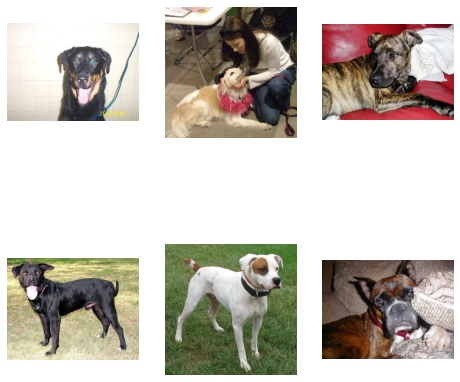

In [ ]:
show_img(img[:6], 2, 3, 'dogs/')

In [ ]:
class Image_Transform():
    def __init__(self, resize, mean, std):
        self.data_transform = {
            'training_set' : transforms.Compose([
                transforms.RandomResizedCrop(resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
        ]),
           'test_set': transforms.Compose([
                transforms.RandomResizedCrop(resize),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std) 
           ]),
            'test' : transforms.Compose([
                transforms.Resize(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
    }
    
    def __call__(self, img, phase='train'):
        return self.data_transform[phase](img)

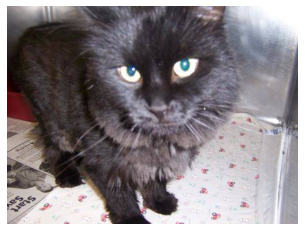

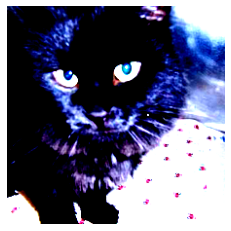

In [ ]:
img_file_path = '../input/cat-and-dog/training_set/training_set/cats/cat.1010.jpg'
img = Image.open(img_file_path)
plt.axis('off')
plt.imshow(img)
plt.show()

resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform = Image_Transform(resize, mean, std)
img_transformed = transform(img, phase='training_set')

# (channel, height, width) -> (height, width, channel)
img_transformed = img_transformed.permute(1, 2, 0)
plt.imshow(img_transformed)
plt.axis('off')
plt.show()

In [ ]:
def make_datapath_list(phase='training_set'):
    root_path = '../input/cat-and-dog/training_set/'
    target_path = os.path.join(root_path + phase + '/**/*.jpg')
    #print(target_path)
    
    path_list = []
    
    for path in glob.glob(target_path):
        path_list.append(path)
        
    return path_list

In [ ]:
path_list = make_datapath_list('training_set')

In [ ]:
len(path_list)

8005

In [ ]:
path_list[:10]

['../input/cat-and-dog/training_set/training_set/dogs/dog.3443.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.1942.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.375.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3259.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.790.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.704.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3593.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.3287.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.83.jpg',
 '../input/cat-and-dog/training_set/training_set/dogs/dog.1494.jpg']

In [ ]:
train_list = make_datapath_list('training_set')
test_list = make_datapath_list('test_set')

In [ ]:
a = str(path_list[1])
a[47:51]

'dogs'

In [ ]:
class MyDataset(Dataset):
    def __init__(self, file_list, transform=None, phase='training_set'):
        self.file_list = file_list
        self.transform = transform
        self.phase = phase
        
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        
        img_transformed = self.transform(img, self.phase)
        
        if self.phase == 'training_set':
            label = img_path[47:51]
        elif self.phase == 'test_set':
            label = img_path[43:47]
            
        if label == 'dogs':
            label = 0
        elif label == 'cats':
            label = 1
            
        return img_transformed, label

In [ ]:
train_ds = MyDataset(train_list, transform=Image_Transform(resize, mean, std), phase='training_set')

In [ ]:
test_ds = MyDataset(test_list, transform=Image_Transform(resize, mean, std), phase='test_set')

In [ ]:
index = 0
#print(train_ds.__len__())
img, label = train_ds.__getitem__(index)
print(img.shape)
print(label)

torch.Size([3, 224, 224])
0


In [ ]:
import random
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
batch_size = 16

train_dataloader = DataLoader(train_ds, batch_size,shuffle=True)
test_dataloader = DataLoader(test_ds, batch_size, shuffle=False)

dataloader_dict = {"train": train_dataloader, 'test': test_dataloader}

In [ ]:
batch_iteration = iter(dataloader_dict['train'])
inputs, labels = next(batch_iteration)

In [ ]:
print(inputs.size())
print(labels)

torch.Size([16, 3, 224, 224])
tensor([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])


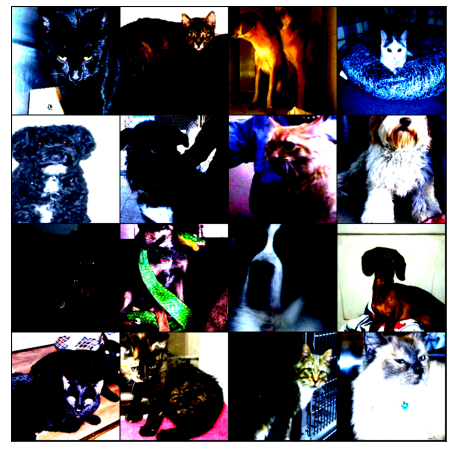

In [ ]:
for imgs, labels in dataloader_dict['train']:
    
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(imgs, 4).permute(1,2,0))
    break

In [ ]:
from torchvision.models import resnet50

In [ ]:
use_pretrained = True
model = resnet50(pretrained=use_pretrained)
#print(net)
model.fc = nn.Sequential(nn.Linear(in_features=2048, out_features=2, bias=True),
                      nn.Sigmoid())
print(model)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
params_to_update = []

update_params_name = ['fc.0.weight', 'fc.0.bias']
for name, param in model.named_parameters():
    if name in update_params_name:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False
        
print(params_to_update)

fc.0.weight
fc.0.bias
[Parameter containing:
tensor([[-0.0108, -0.0054, -0.0143,  ...,  0.0193,  0.0179, -0.0088],
        [-0.0119,  0.0118, -0.0156,  ...,  0.0073,  0.0175, -0.0220]],
       requires_grad=True), Parameter containing:
tensor([0.0132, 0.0171], requires_grad=True)]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model.parameters(), lr=1e-3, momentum=0.9)

In [ ]:
from tqdm import tqdm

In [ ]:
def train_model(model, dataloader_dict, criterion, optimizer, n_examples, device):
    model = model.train()
    
    epoch_loss = 0.0
    correct_prediction = 0
    global epoch_accuracy
    for images, labels in dataloader_dict:
        
        images = images.to(device)
        labels = labels.to(device)
        
             
        # Forward
        outputs = model(images)
        # Calculate loss
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        
        epoch_loss += loss.item()*images.size(0)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        correct_prediction += torch.sum(preds == labels.data)
        
        epoch_loss = epoch_loss / len(dataloader_dict.dataset)
        epoch_accuracy = correct_prediction.double() / len(dataloader_dict.dataset)
        
    return epoch_accuracy, epoch_loss

In [ ]:
def evaluate_epoch(model, dataloader_dict, criterion, optimizer, n_examples, device):
    model.eval()
    
    epoch_loss = 0.0
    correct_prediction = 0
    global epoch_accuracy
    with torch.no_grad():
        for images, labels in dataloader_dict:
            # Load images, labels to device
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            
            _, preds = torch.max(outputs, 1)
            
            epoch_loss += loss.item()*images.size(0)
            correct_prediction += torch.sum(preds == labels.data)
            
            epoch_loss = epoch_loss / len(dataloader_dict.dataset)
            epoch_accuracy = correct_prediction.double() / len(dataloader_dict.dataset)
            
        return epoch_accuracy, epoch_loss

In [ ]:
from collections import defaultdict

In [ ]:
print(len(dataloader_dict['train']))

501


In [ ]:
%%time
history = defaultdict(list)
best_val_acc = 0.0
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
EPOCHS = 5

for epoch in tqdm(range(EPOCHS), desc='Training...'):
    print(f'\nEpoch: [{epoch+1}/{EPOCHS}]')
    print('-'*30)
    
    train_acc, train_loss = train_model(model, dataloader_dict['train'], criterion, optimizer, len(dataloader_dict['train']), device)
    val_acc, val_loss = evaluate_epoch(model, dataloader_dict['test'], criterion, optimizer, len(dataloader_dict['test']), device)
    
    print('Train Loss: {:.4f}\t Train Acc: {:.4f}'.format(train_loss, train_acc))
    print('Val Loss: {:.4f}\t Val Acc: {:.4f}'.format(val_loss, val_acc))
    
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_restnet.pth')
        

Training...:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch: [1/5]
------------------------------


Training...:  20%|██        | 1/5 [19:00<1:16:02, 1140.65s/it]

Train Loss: 0.0002	 Train Acc: 0.9322
Val Loss: 0.0000	 Val Acc: 0.9322

Epoch: [2/5]
------------------------------
Train Loss: 0.0003	 Train Acc: 0.9577
Val Loss: 0.0000	 Val Acc: 0.9577


Training...:  40%|████      | 2/5 [37:23<55:55, 1118.49s/it]  


Epoch: [3/5]
------------------------------
Train Loss: 0.0003	 Train Acc: 0.9587
Val Loss: 0.0000	 Val Acc: 0.9587


Training...:  60%|██████    | 3/5 [55:42<36:59, 1109.55s/it]


Epoch: [4/5]
------------------------------
Train Loss: 0.0003	 Train Acc: 0.9628
Val Loss: 0.0000	 Val Acc: 0.9628


Training...:  80%|████████  | 4/5 [1:14:02<18:25, 1105.94s/it]


Epoch: [5/5]
------------------------------


Training...: 100%|██████████| 5/5 [1:32:22<00:00, 1108.50s/it]

Train Loss: 0.0002	 Train Acc: 0.9606
Val Loss: 0.0000	 Val Acc: 0.9606
CPU times: user 2h 36min 33s, sys: 26min 47s, total: 3h 3min 20s
Wall time: 1h 32min 22s


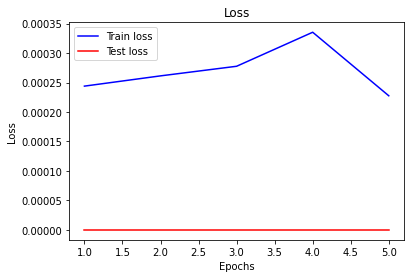

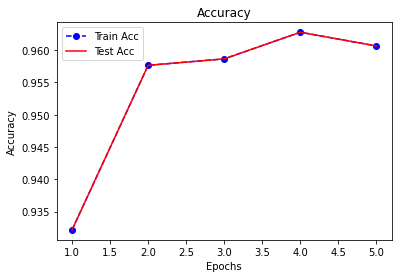

In [ ]:
# Plot results
plt.title('Loss')
plt.plot(np.arange(1,6), history['train_loss'], color='blue', label='Train loss')
plt.plot(np.arange(1,6), history['val_loss'], color='red', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.title('Accuracy')
plt.plot(np.arange(1,6), history['train_acc'], 'bo--', label='Train Acc')
plt.plot(np.arange(1,6), history['val_acc'], color='red', label='Test Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def load_model(model, model_path):
    load_weights = torch.load(model_path,  map_location={"cuda:0": "cpu"})
    model.load_state_dict(load_weights)

    # print(net)
    # for name, param in net.named_parameters():
    #     print(name, param)
    
    return model

In [ ]:
class_index = ['dogs', 'cats']

class Predictor():
    def __init__(self, class_index):
        self.class_index = class_index
        
    def predict_max(self, output):
        max_id = np.argmax(output.detach().numpy())
        predicted_label = self.class_index[max_id]
        return predicted_label
    
predictor = Predictor(class_index)

def predict(img):
    use_pretrained = True
    model = resnet50(pretrained=use_pretrained)
    model.fc = nn.Sequential(nn.Linear(in_features=2048, out_features=2, bias=True),
                      nn.Sigmoid())
    model.eval()
    
    
    model = load_model(model, './best_restnet.pth')
    
    #prepare inputdata
    '''
    img = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    '''
    transform = Image_Transform(resize, mean, std)
    img = transform(img, phase="test")
    img = img.unsqueeze(0)
    
    output = model(img)
    response = predictor.predict_max(output)
    
    return response

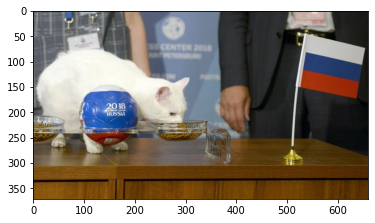

	Predicted image:cats


In [ ]:
test_img = Image.open('../input/test-img/photo-1-15291980975752067109398.png').convert('RGB')
plt.imshow(test_img)
plt.show()
print('\tPredicted image:' + predict(test_img))